In [120]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [121]:
X = np.arange(1, 21)
Y = np.arange(1, 21) + 3*np.random.randn(20)

In [122]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y)

In [123]:
Y_test.shape

(5,)

In [139]:
#we are assuming them to be one dimensional each
def fit(x_train, y_train):
    num = (x_train*y_train).mean() -x_train.mean() * y_train.mean()
    den = (x_train**2).mean() -x_train.mean()**2
    m =num/den
    c = y_train.mean() -m * x_train.mean()
    return m,c

In [140]:
def predict(x, m, c):
    y_pred = m*x + c
    return y_pred

In [141]:
# 1 - (u/v)  u = (ytrue - ypred)^2     v = (ytrue - ytrue.mean())2
def coeffdeter(y_pred, y_true):
    u = ((y_true - y_pred)**2).sum()
    v = ((y_true - y_true.mean())**2).sum()
    return (1 - (u/v))

In [142]:
def cost(y, m, x, c):
    cost = (y - (m*x + c))
    cost = cost*cost
    return cost.sum()

In [143]:
m, c = fit(X_train, Y_train)
m, c

(1.2564697622918026, -1.2066156510710204)

In [144]:
y_pred = predict(X_test, m, c)

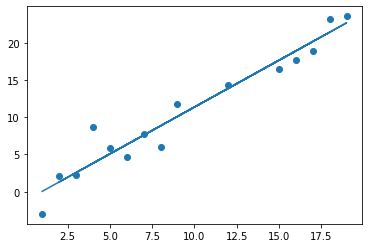

In [145]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, m*X_train + c)
plt.show()

In [146]:
costVal = cost(Y_test, m, X_test, c)
costVal

31.882925978579355

In [147]:
cd = coeffdeter(y_pred, Y_test)

In [148]:
cd

0.7381578870721051

In [134]:
# Comparing with Linear Regression inbuilt
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(X_train.reshape(-1, 1), Y_train)
alg.coef_ , alg.intercept_

(array([1.25646976]), -1.2066156510710204)

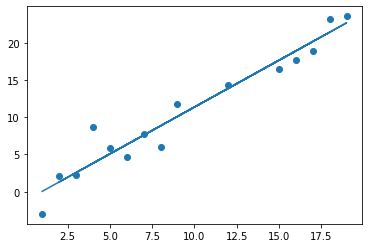

In [135]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, alg.coef_[0]*X_train + alg.intercept_)
plt.show()

In [137]:
score_test = alg.score(X_test.reshape(-1, 1), Y_test.reshape(-1, 1))


In [138]:
score_test

0.7381578870721051